# Model using XGBoost with Survive:Cox

In [1]:
import sys
import os
project_root = "C:/Users/lenovo/Desktop/06008481-math70076-assessment-2" # Replace with your own path

# Append the full path of 03-src to sys.path
src_path = os.path.join(project_root, '03-src')
sys.path.append(src_path)

import importlib
import XGB_with_Survive_Cox  # Replace with the module name you need
importlib.reload(XGB_with_Survive_Cox)

<module 'XGB_with_Survive_Cox' from 'C:\\Users/lenovo/Desktop/06008481-math70076-assessment-2\\03-src\\XGB_with_Survive_Cox.py'>

In [2]:
# main.py

import pandas as pd
from XGB_with_Survive_Cox import train_xgb_survival_cox

# Load sample data
data = pd.read_csv("C:/Users/lenovo/Desktop/06008481-math70076-assessment-2/02-data/02-02-derived-data/01-processed-data.csv")
data


,ID,dri_score,psych_disturb,diabetes,hla_match_c_high,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,...,hepatic_mild,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42.356
1,1,1,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,4.672
2,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,19.793
3,3,2,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,102.349
4,4,2,0,0,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,16.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,28795,7,3,0,1,0,0,0,1,0,...,2,3,0,0,3,0,0,0,0,18.633
28796,28796,2,0,1,2,0,0,4,1,0,...,0,1,0,5,1,1,1,5,1,4.892
28797,28797,6,3,3,1,0,2,0,1,0,...,2,0,0,0,3,0,0,0,0,23.157
28798,28798,0,0,0,2,0,0,2,1,0,...,0,1,1,4,0,1,0,4,0,52.351


In [3]:
FEATURES_Total = [c for c in data.columns]
print(f"There are {len(FEATURES_Total)} FEATURES: {FEATURES_Total}")

There are 52 FEATURES: ['ID', 'dri_score', 'psych_disturb', 'diabetes', 'hla_match_c_high', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'in_vivo_tcd', 'hla_match_a_high', 'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10', 'efs', 'efs_time']


In [4]:
RMV = ["ID","efs","efs_time","y"]
FEATURES = [c for c in data.columns if not c in RMV]
print(f"There are {len(FEATURES)} FEATURES: {FEATURES}")

There are 49 FEATURES: ['dri_score', 'psych_disturb', 'diabetes', 'hla_match_c_high', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'in_vivo_tcd', 'hla_match_a_high', 'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10']


In [5]:
CAT_vir = [c for c in FEATURES if data[c].nunique() <20 ]
print(f"There are {len(CAT_vir)} FEATURES: {CAT_vir}")

There are 47 FEATURES: ['dri_score', 'psych_disturb', 'diabetes', 'hla_match_c_high', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'in_vivo_tcd', 'hla_match_a_high', 'hepatic_severe', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10']


##############################
### Fold 1
##############################
[0]	validation_0-cox-nloglik:7.24422
[500]	validation_0-cox-nloglik:7.07294
[1000]	validation_0-cox-nloglik:7.05443
[1500]	validation_0-cox-nloglik:7.04918
[1999]	validation_0-cox-nloglik:7.04684
##############################
### Fold 2
##############################
[0]	validation_0-cox-nloglik:7.26231
[500]	validation_0-cox-nloglik:7.09025
[1000]	validation_0-cox-nloglik:7.08030
[1500]	validation_0-cox-nloglik:7.07877
[1999]	validation_0-cox-nloglik:7.07923
##############################
### Fold 3
##############################
[0]	validation_0-cox-nloglik:7.26194
[500]	validation_0-cox-nloglik:7.11137
[1000]	validation_0-cox-nloglik:7.09638
[1500]	validation_0-cox-nloglik:7.09072
[1999]	validation_0-cox-nloglik:7.08997
##############################
### Fold 4
##############################
[0]	validation_0-cox-nloglik:7.27057
[500]	validation_0-cox-nloglik:7.11772
[1000]	validation_0-cox-nloglik:7.10516
[150

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:729: UserWarning: [02:40:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


Test C-index: 0.6757
Feature importance plot saved to C:/Users/lenovo/Desktop/06008481-math70076-assessment-2/06-outputs/02-Model-result/04_XGB_Cox_feature_importance.png


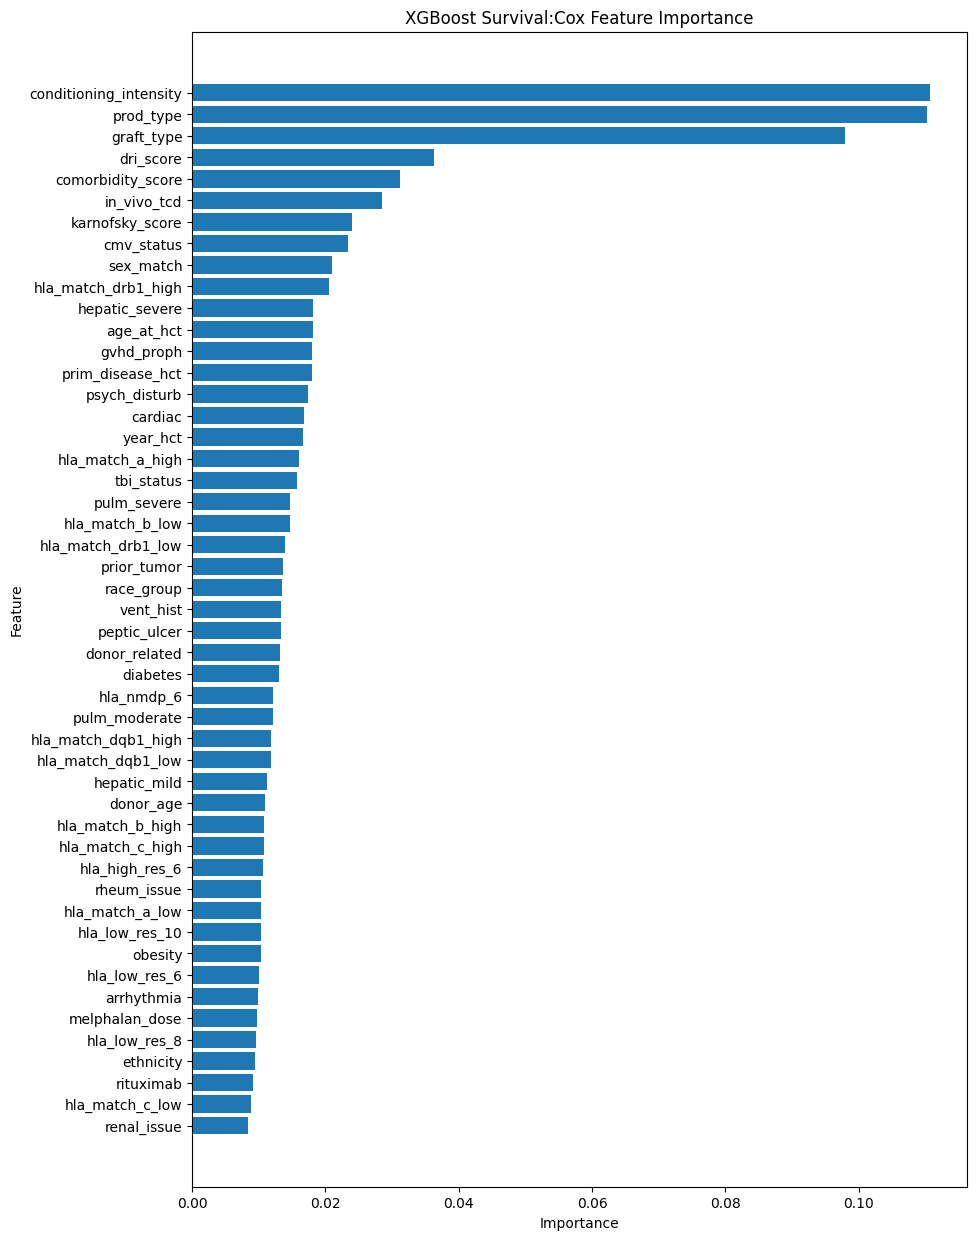

In [6]:
# 训练模型并绘制特征重要性图（可保存图像）
model, c_index, importance_df = train_xgb_survival_cox(
    data = data,
    features = FEATURES,
    plot_feature_importance=True,
    save_fig="C:/Users/lenovo/Desktop/06008481-math70076-assessment-2/06-outputs/02-Model-result/04_XGB_Cox_feature_importance.png"
)

In [7]:
save_path = "C:/Users/lenovo/Desktop/06008481-math70076-assessment-2/06-outputs/02-Model-result/"

# save importance_df as csv document
importance_df.to_csv(os.path.join(save_path, "04_XGB_Cox_feature_importance.csv"), index=False)

#save importance_df as csv document
c_index_df = pd.DataFrame({"c_index": [c_index]})
c_index_df.to_csv(os.path.join(save_path, "04_XGB_Cox_c_index.csv"), index=False)

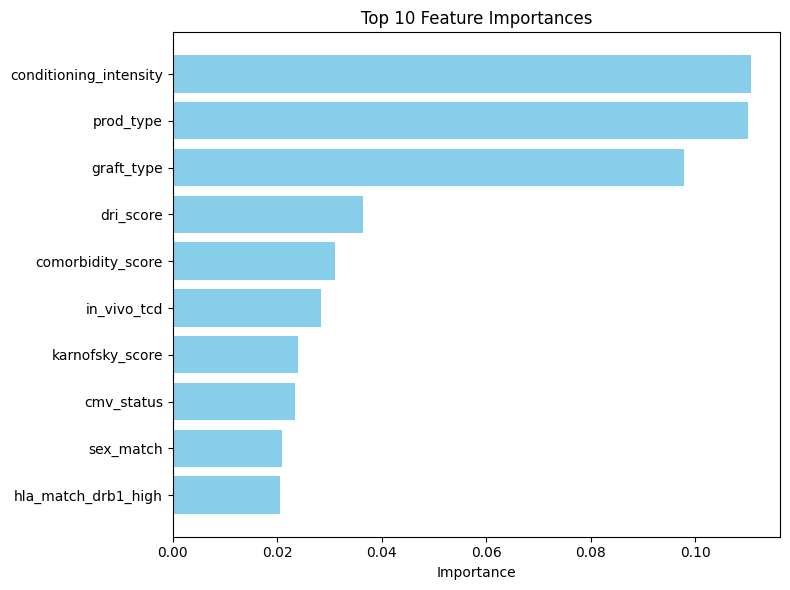

In [8]:
import matplotlib.pyplot as plt

# Get the most important 10 features
top10 = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the bar figure
plt.figure(figsize=(8, 6))
plt.barh(top10['Feature'], top10['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis() 
plt.tight_layout()

save_path = "C:/Users/lenovo/Desktop/06008481-math70076-assessment-2/06-outputs/02-Model-result/"
file_name = "04_XGB_Cox_Top10_feature_importance.png"

# 拼接完整路径
full_path = os.path.join(save_path, file_name)

# 保存图像
plt.savefig(full_path, bbox_inches='tight')
plt.show()